In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Fawad\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df= pd.read_excel('full_data.xlsx')

In [3]:
df.head()

,Date,Price
0,2010-08-18,0.074000
1,2010-08-20,0.066700
2,2010-08-22,0.066400
3,2010-08-24,0.066889
4,2010-08-26,0.066499


In [4]:
df.tail()

,Date,Price
1358,2018-01-24,11282.258333
1359,2018-01-26,10969.815000
1360,2018-01-28,11765.710000
1361,2018-01-30,10184.061667
1362,2018-02-01,9083.258333


In [11]:
df.set_index('Date', inplace=True)

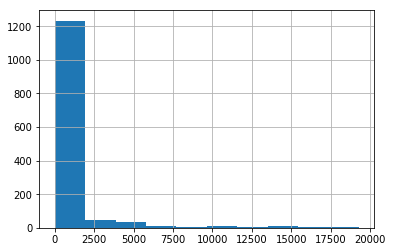

In [12]:
df['Price'].hist()

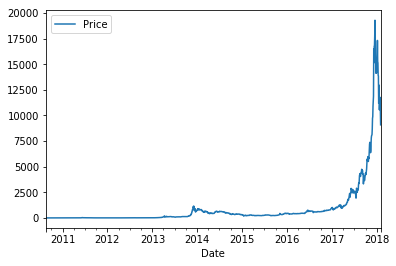

In [13]:
df.plot()

In [14]:
timeseries = df['Price']


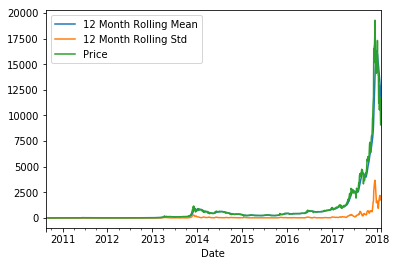

In [15]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

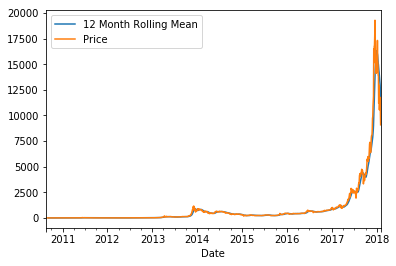

In [16]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

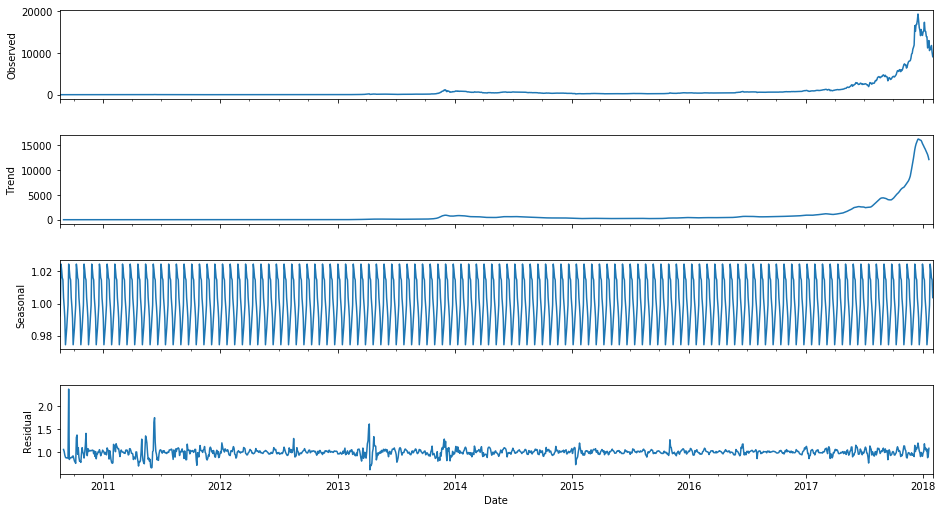

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Price'],model='multiplicative', freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
result = adfuller(df['Price'])

In [23]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.66606601354
p-value : 0.855344530124
#Lags Used : 24
Number of Observations Used : 1338
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
#Differencing

df['First Difference'] = df['Price'] - df['Price'].shift(1)

In [27]:
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.60011529889
p-value : 2.40176117287e-11
#Lags Used : 24
Number of Observations Used : 1337
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


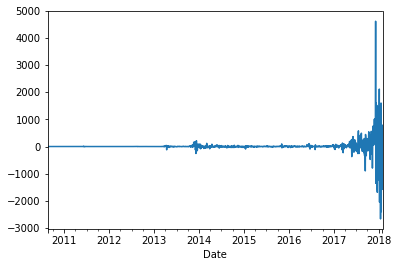

In [28]:
df['First Difference'].plot()

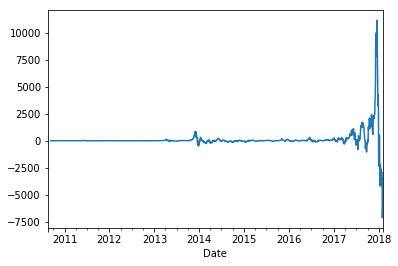

In [29]:
df['Seasonal Difference'] = df['Price'] - df['Price'].shift(12)
df['Seasonal Difference'].plot()

In [30]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.03017051835
p-value : 6.21479681953e-10
#Lags Used : 24
Number of Observations Used : 1326
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

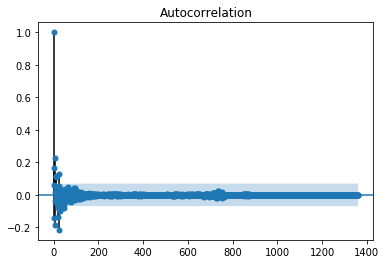

In [37]:
#figure= fig_size(12,8)
figure = plot_acf(df["First Difference"].dropna())

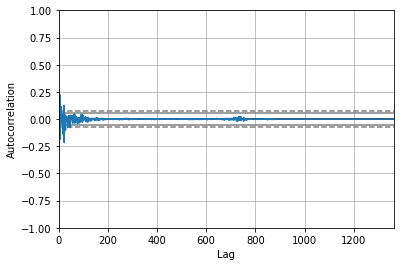

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['First Difference'].dropna())

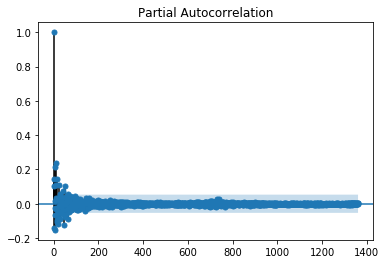

In [34]:
result = plot_pacf(df["First Difference"].dropna())

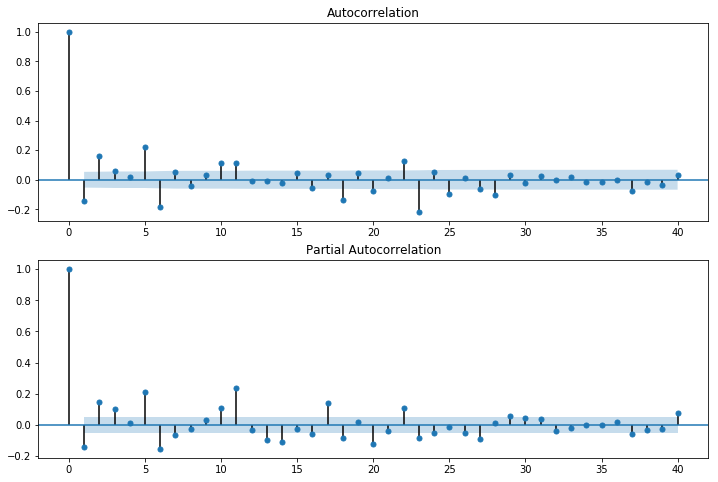

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First Difference'].iloc[13:], lags=40, ax=ax2)

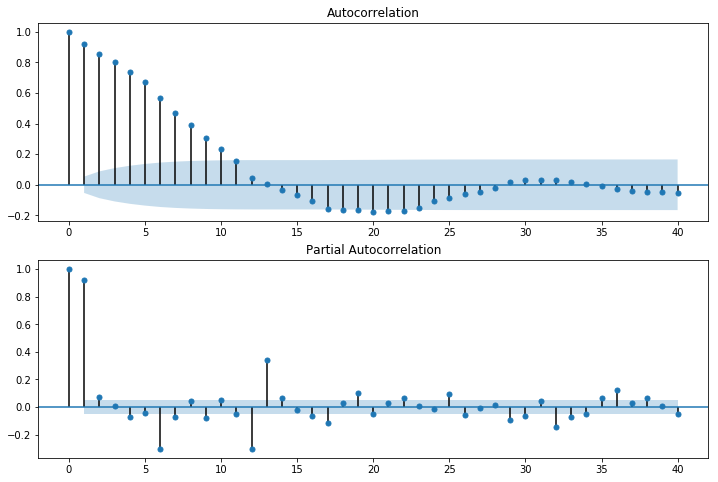

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal Difference'].iloc[13:], lags=40, ax=ax2)

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [125]:
model = sm.tsa.statespace.SARIMAX(df['Price'],order=(2,2,0), seasonal_order=(2,1,1,12))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Price   No. Observations:                 1363
Model:             SARIMAX(2, 2, 0)x(2, 1, 1, 12)   Log Likelihood               -9463.196
Date:                            Sat, 10 Feb 2018   AIC                          18938.393
Time:                                    22:46:25   BIC                          18969.697
Sample:                                08-18-2010   HQIC                         18950.111
                                     - 02-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8577      0.005   -169.550      0.000      -0.868      -0.848
ar.L2         -0.3731      0.006   

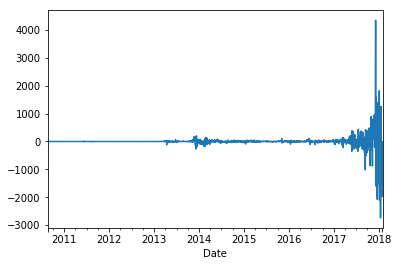

In [84]:
results.resid.plot()

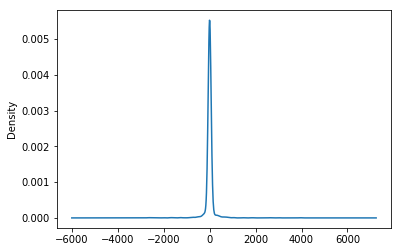

In [95]:
results.resid.plot(kind='kde')

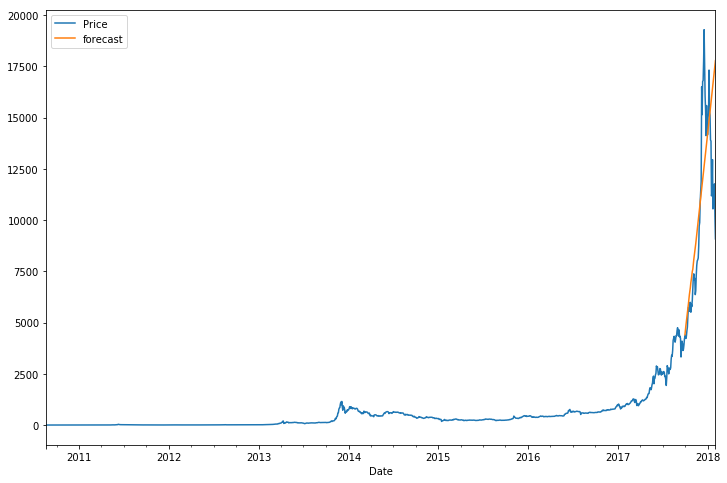

In [126]:


df['forecast'] = results.predict(start = 1300, end= 1363, dynamic= True)  
df[['Price','forecast']].plot(figsize=(12,8))

In [127]:
df.tail(10)

,Price,First Difference,Seasonal Difference,forecast
Date,,,,
2018-01-14,13852.920000,-59.962000,-2194.590000,15734.245903
2018-01-16,11180.998333,-2671.921667,-4179.263333,15961.290236
2018-01-18,11345.423333,164.425000,-2773.605000,16186.070961
2018-01-20,12950.793333,1605.370000,-2638.528333,16414.888767
2018-01-22,10544.593333,-2406.200000,-4095.546667,16639.548533
2018-01-24,11282.258333,737.665000,-2883.316667,16860.238720
2018-01-26,10969.815000,-312.443333,-4036.041667,17087.240809
2018-01-28,11765.710000,795.895000,-3433.645000,17325.764112
2018-01-30,10184.061667,-1581.648333,-7135.136333,17549.617647


In [101]:
from fbprophet import Prophet

In [104]:
data= pd.read_excel('full_data.xlsx')

In [105]:
data.head()

,Date,Price
0,2010-08-18,0.074000
1,2010-08-20,0.066700
2,2010-08-22,0.066400
3,2010-08-24,0.066889
4,2010-08-26,0.066499


In [115]:
data.columns= ['ds','y']

In [116]:
data.head()

,ds,y
0,2010-08-18,0.074000
1,2010-08-20,0.066700
2,2010-08-22,0.066400
3,2010-08-24,0.066889
4,2010-08-26,0.066499


In [117]:
m = Prophet()

In [118]:
m.fit(data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1723,2019-01-28
1724,2019-01-29
1725,2019-01-30
1726,2019-01-31
1727,2019-02-01


In [120]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1723,2019-01-28,14742.142055,13222.527786,16367.372392
1724,2019-01-29,14730.294267,13088.402750,16507.744632
1725,2019-01-30,14721.868779,13073.610442,16439.819478
1726,2019-01-31,14710.901251,13149.738250,16265.730086
1727,2019-02-01,14690.423362,13063.490453,16289.645407


TypeError: 'Figure' object is not subscriptable

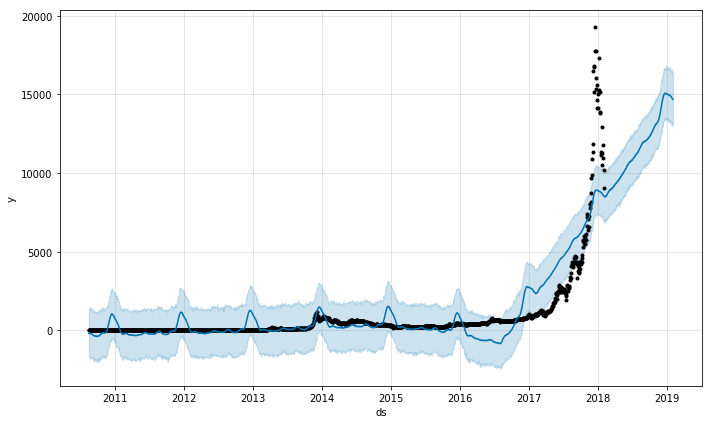

In [123]:
m.plot(forecast)[:1]

TypeError: 'Figure' object is not subscriptable

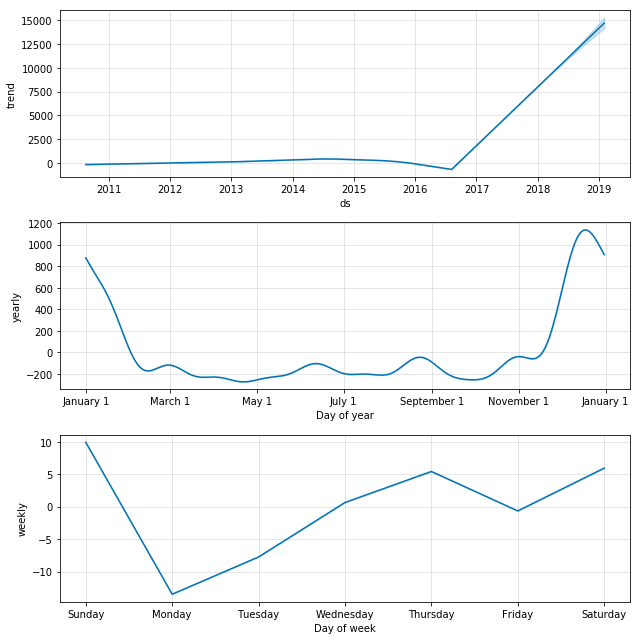

In [128]:
m.plot_components(forecast)[:1]